# Indirect social influence helps shaping the diffusion of innovations

## Analysis of participant demographics 

Experiment        Ages
count  596.000000  596.000000
mean    11.078859   30.392617
std      5.999061   11.215845
min      1.000000   18.000000
25%      6.000000   23.000000
50%     11.000000   25.000000
75%     16.000000   34.000000
max     21.000000   74.000000

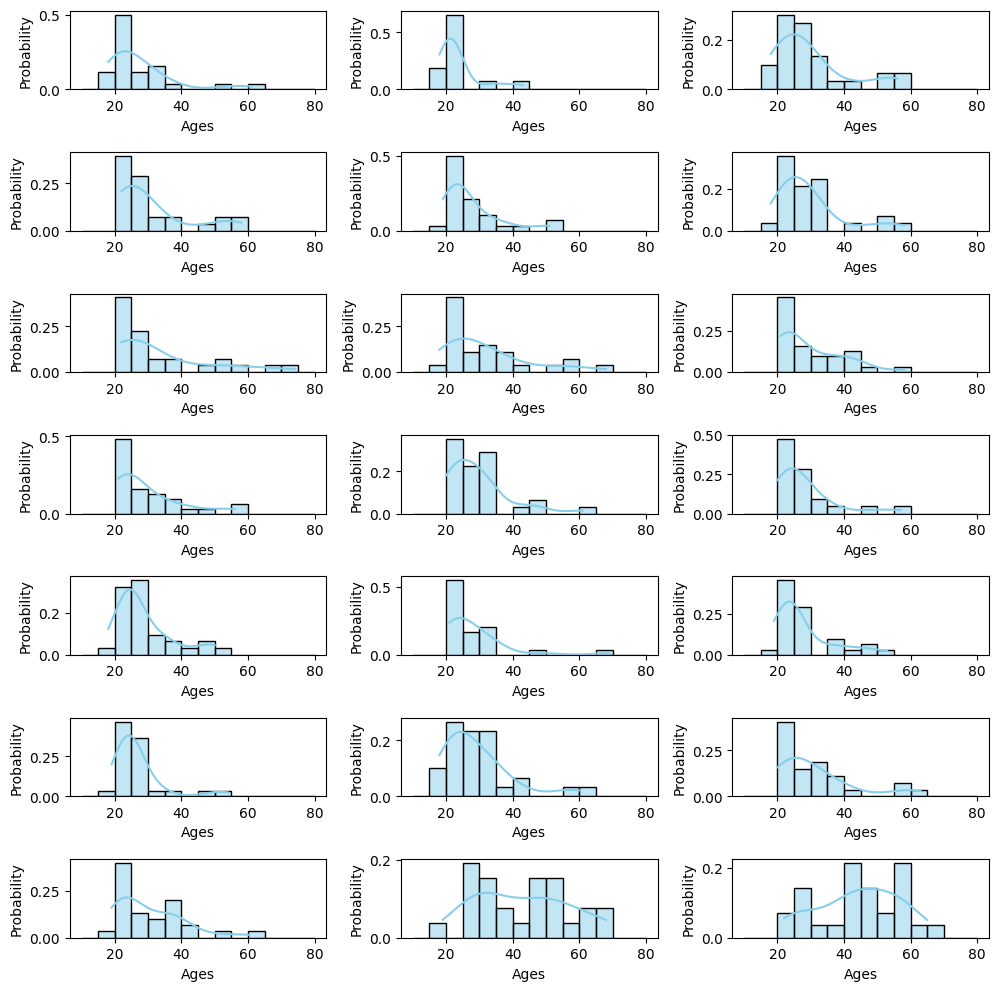

In [13]:

import os
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the file "demographics_t2.csv" as a dataframe
df = pd.read_csv("demographics_t2.csv")

#Edad media
display(df.describe())   

# Create a a grid of plots, there are as many as the maximum value of the "Experiment" column. In each plot you have to make a relative frequency histogram of the column "Ages".

# Get the maximum value of the "Experiment" column
max_experiment = df["Experiment"].max()

palette = iter(sns.husl_palette(max_experiment))

# Iterate over each experiment and plot the histogram
# Calculate the number of rows and columns based on the maximum value of the "Experiment" column
num_rows = (max_experiment - 1) // 3 + 1
num_cols = min(max_experiment, 3)

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

for i in range(1, max_experiment + 1):
    # Calculate the row and column indices for the current experiment
    row_idx = (i - 1) // num_cols
    col_idx = (i - 1) % num_cols
    
    # Filter the dataframe for the current experiment
    experiment_df = df[df["Experiment"] == i]
    
    # Plot the histogram on the corresponding subplot
    sns.histplot(data=experiment_df, x="Ages", ax=axes[row_idx, col_idx], kde=True, binrange=[10,80], binwidth=5, stat="probability", color="skyblue") #color=next(palette))  

    # Set the title for the subplot
    #axes[row_idx, col_idx].set_title(f"Experiment {i}")
    
    # Adjust the x-axis label rotation
    axes[row_idx, col_idx].tick_params(axis='x', rotation=0)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig("Distribution_per_experiment.pdf", format="pdf", bbox_inches="tight") 
plt.show()

palette2 = iter(sns.husl_palette(h=.5, n_colors=3))    

#https://cesarquezadab.com/2022/02/22/dominando-graficos-en-python-con-matplotlib-y-seaborn/
fig2= plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.kdeplot(data=df, x="Ages", hue="Gender", cut=0, fill=True, common_norm=True, alpha=0.2)
plt.savefig("Gender_age.pdf", format="pdf", bbox_inches="tight")
plt.show()


# A este gráfico le falta una caption que diga que proporción hay de cada grupo, porque al ser una density parace que hay muchos no binarios.
#If True, scale each conditional density by the number of observations such that the total area under all densities sums to 1

# Create a summary table
summary_table = pd.DataFrame()

# Count the total number of people by gender
total_counts = df["Gender"].value_counts()
summary_table["Total"] = total_counts

# Count the number of people by gender for each experiment
for i in range(1, max_experiment + 1):
    experiment_counts = df[df["Experiment"] == i]["Gender"].value_counts()
    summary_table[f"Experiment {i}"] = experiment_counts

# Display the summary table

display(summary_table)


summary_table.to_csv("resumen_genero.csv")

